# Calibrazione di un potenziometro

Lo scopo dell’esercitazione è quello di determinare la costante di trasduzione di un potenziometro da [V] a [deg]

## Setup
Vedi file [QuanserMotor.pdf](QuanserMotor.pdf)

Dati misurati contenuti nel file [pot_calib.txt](pot_calib.txt)
Prima colonna: posizione angolare [deg]
Seconda colonna: tensione in uscita al potenziometro [V]

In [1]:
# importo moduli
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import pi

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [14, 10]

In [3]:
# caricamento dati
calib = pd.read_csv("./pot_calib.txt", header=None, names=["angolare [deg]", "voltaggio [V]"]);
calib

,angolare [deg],voltaggio [V]
0,-135.0,-1.670
1,-90.0,-1.080
2,-45.0,-0.573
3,0.0,0.000
4,45.0,0.573
5,90.0,1.080
6,135.0,1.670


k = 6.2104479342923335e-15 [deg/V]


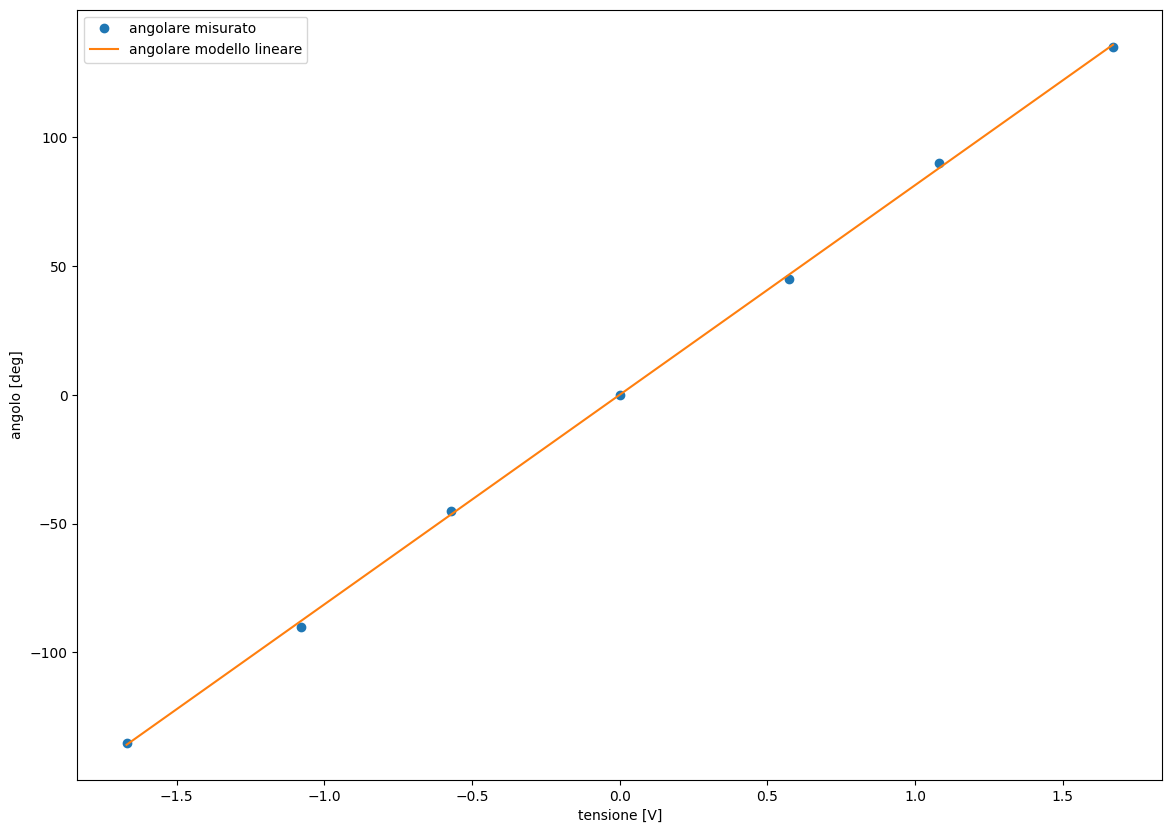

In [6]:
# visualizzazione dati
plt.plot(calib["voltaggio [V]"], calib["angolare [deg]"], 'o')
plt.ylabel('angolo [deg]')
plt.xlabel('tensione [V]')

# stima modello lineare (polinomio di primo grado) con polyfit
modello1 = np.polyfit(calib["voltaggio [V]"], calib["angolare [deg]"], 1);
ymodello1 = np.polyval(modello1, calib["voltaggio [V]"]);

# confronto con dati
plt.plot(calib["voltaggio [V]"], ymodello1);
plt.legend(["angolare misurato", "angolare modello lineare"]);

# calcolo costante di trasduzione
k = modello1[1];

# coefficiente angolare della retta
print(f'k = {k} [deg/V]');

Determinare
1. L’errore massimo percentuale del modello lineare

err= 1.59%


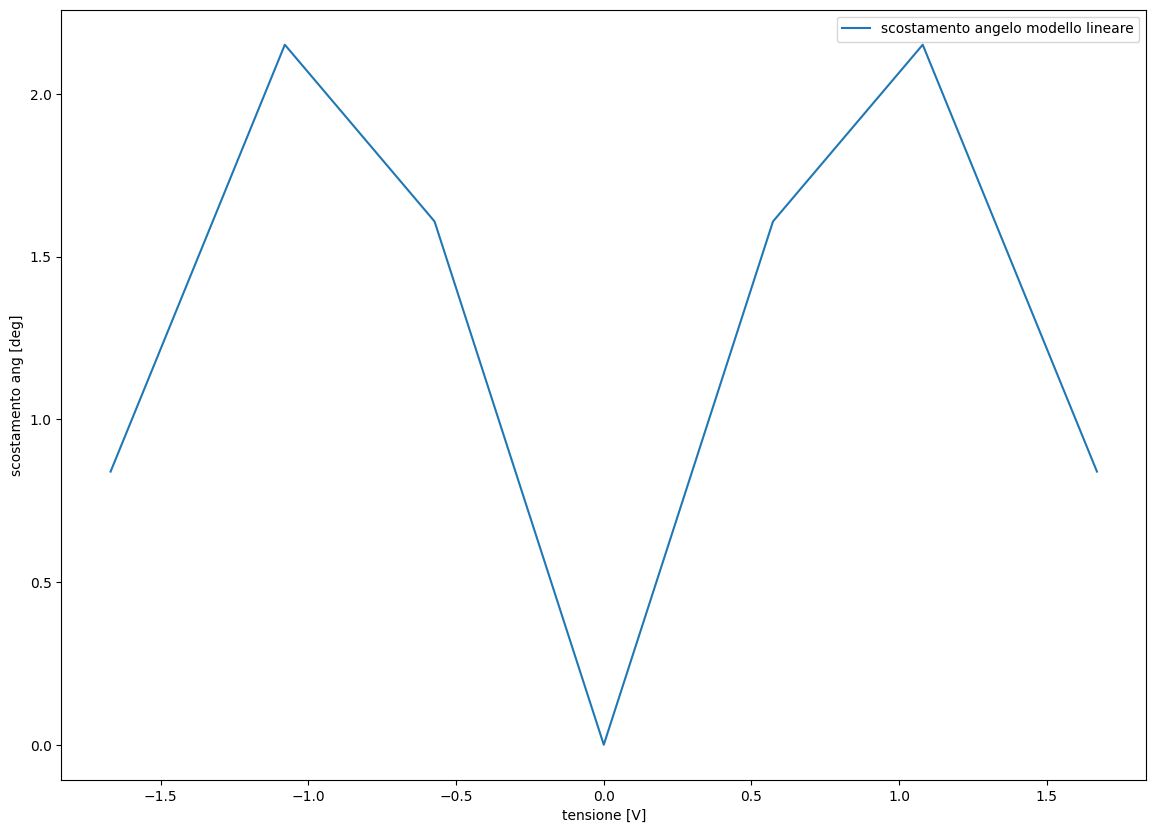

In [8]:
# accuratezza=scostamento max tra valore vero e uscita modello
scostamento = abs(ymodello1 - calib["angolare [deg]"]);

# errore
scostamento_max = max(scostamento);

# errore max
errore = scostamento_max / max(calib["angolare [deg]"]) * 100;

# errore percentuale rispetto a valore massimo
plt.plot(calib["voltaggio [V]"], scostamento);
plt.ylabel('scostamento ang [deg]');
plt.xlabel('tensione [V]');
plt.legend(["scostamento angelo modello lineare"]);
print(f'err= {errore:#.2f}%')